In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]], dtype = np.float64)
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [3]:
# -1, -0.2, 1.3, 0.05 ...

In [4]:
# p [0, 1]

In [5]:
# p / (1-p)

In [6]:
0.5 / (1-0.5)

1.0

In [7]:
0.01 / (1 - 0.01)

0.010101010101010102

In [8]:
0.9999 / (1-0.9999)

9999.0000000011

In [9]:
p = 1-1e-10
np.log(p / (1 - p))

23.025850847100088

In [10]:
p = 0.8
np.log(p / (1 - p))

1.3862943611198908

In [11]:
np.log(p / (1 - p)) # (-inf, +inf)

1.3862943611198908

In [12]:
# W*X = np.log(p / (1 - p))

In [13]:
# z = W*X

In [14]:
z = np.log(p / (1 - p))

In [15]:
# t = p / (1 - p) => t*(1-p) = p => t - t*p = p => t = p + t*p => t/p = 1 + t => p = t / (1 + t)

In [16]:
# p = t / (1 + t)

In [17]:
# z = np.log(t) => t = e**z => e**(W*X)

In [18]:
# p = t / (1 + t) => p = e**z / (1 + e**z) => p = 1 / (1/e**z + 1) => p = 1 / (1 + e**(-z)) => p = 1/(1 + e**(-W*X))

In [19]:
# p = 1/(1 + e**(-W*X))

In [20]:
X

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [21]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [22]:
def calc_std_feat(x):
  res = (x - x.mean()) / x.std()
  return res

In [23]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

In [24]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

In [25]:
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    err = np.sum(err)
    return err

In [26]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0.1])
calc_logloss(y1, y_pred1)

0.10536051565782628

In [27]:
def sigmoid(z):
  res = 1 / (1 + np.exp(-z))
  return res

In [28]:
z = np.linspace(-10, 10, 101)

In [29]:
probabilities = sigmoid(z)

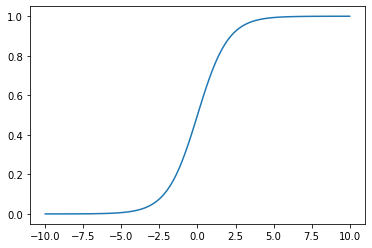

In [30]:
plt.plot(z, probabilities)

In [31]:
### Logistic Regression

In [32]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [42]:
W = eval_model(X_st, y, iterations=1000, alpha=1e-4)

100 [ 0.49282748 -0.15007528  0.64748973  1.51727915] 1.2014814214705334
200 [ 0.48896219 -0.16184918  0.64728128  1.51155738] 1.1828456288538924
300 [ 0.48511874 -0.17358386  0.64706349  1.50586552] 1.1643525542846553
400 [ 0.4812976  -0.18527698  0.64683669  1.50020462] 1.1460086359433084
500 [ 0.47749927 -0.19692597  0.64660127  1.4945758 ] 1.127820879406358
600 [ 0.47372426 -0.20852799  0.6463577   1.48898028] 1.109796908143704
700 [ 0.46997312 -0.22007992  0.6461065   1.48341934] 1.0919450148769096
800 [ 0.46624642 -0.23157833  0.64584825  1.47789438] 1.074274212586137
900 [ 0.46254476 -0.24301946  0.64558365  1.4724069 ] 1.0567942835649755
1000 [ 0.45886878 -0.25439917  0.64531344  1.46695851] 1.0395158244739489


In [34]:
from sklearn.linear_model import LogisticRegression as LR

In [35]:
# LR?

    1*. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.  
    2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.
    3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).
    4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).
    5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.
    6. Могла ли модель переобучиться? Почему?
    7*. Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.

In [36]:
import math

In [40]:
def home_eval_model(X, y, iterations, alpha=1e-4):
    lambda_=1e-8
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T) + (lambda_/2) * np.sum(np.abs(W)))
#         if i % (iterations / 10) == 0:
#             print(i, W, err)
    return [W,err]

2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [54]:
def get_min_log_loss(input1, input2, input3, input4):
    err = 1
    counter_isnan = 0
    for i in range(len(input4)):
        resula_array = home_eval_model(input1, input2, input3, input4[i])
#         print(resula_array[1])
        if (resula_array[1] < err):
#             print(f"Перезаписываю err {err} на {resula_array[1]}")
            err = resula_array[1]
            result_alpha =  input4[i]
        else:
            if (math.isnan(resula_array[1])):
                counter_isnan+= 1
        if (counter_isnan > 0): # Если мы получили >5 nan значит дальше ловить нечего
            print (f" Минимальный logloss равен {err} и достигнут при alpha = {input4[i]}")
            return resula_array[1]
    
alpha=np.linspace(0, 1000, 10200)
# auto_alpha = get_min_log_loss(X_st, y, 1000, alpha)
W = eval_model(X_st, y, iterations=1000, alpha=8.236101578586137)
# 0.08084589352906987

/home/belfigor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/home/belfigor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


100 [-28.37506413 -12.68097228   0.32155747  27.38876085] nan
200 [-41.94220845  -4.87582646 -10.56557607  36.00370614] 0.11338083671986958
300 [-48.25300693  -5.39373995 -12.44541021  40.70815228] 0.09455231711978276
400 [-49.57125769  -4.79855774 -13.53807349  40.38307699] 0.08877410068019961
500 [-50.33981762  -4.81491922 -13.80438506  40.90053817] 0.0876370366566457
600 [-51.05790671  -4.86805545 -14.01648443  41.46123659] 0.08657147110810866
700 [-51.75353554  -4.91543616 -14.22431547  42.01838003] 0.0855811938399507
800 [-52.44560265  -4.97633771 -14.42141446  42.55039294] 0.08457753417088928
900 [-53.12148729  -5.03184238 -14.61691004  43.07342982] 0.08363715243660427
1000 [-53.78218898  -5.08314122 -14.80993318  43.58865467] 0.08273610538350618


3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [55]:
def calc_pred_proba(w, X):
    print(f"На вход подано w:{w}")
    m = X.shape[1]
    
    y_predicted = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X))
    
    return A
    
calc_pred_proba(W, X_st)

На вход подано w:[-53.78218898  -5.08314122 -14.80993318  43.58865467]


array([[0.31669164, 0.00102965, 1.        , 0.02138892, 0.97437028,
        0.00777831, 1.        , 0.00574516, 0.68094199, 1.        ]])

4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [63]:
def calc_pred(w, X):
    print(f"На вход подано w:{w}")
    m = X.shape[1]
    
    y_pred = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X))
    
#     За порог отнесения к тому или иному классу примем вероятность 0.5
    for i in range(A.shape[1]):
        if (A[:,i] > 0.5): 
            y_pred[:, i] = 1
        elif (A[:,i] <= 0.5):
            y_pred[:, i] = 0
    
    return y_pred[0]
    
y_pred = calc_pred(W, X_st)
y_pred

На вход подано w:[-53.78218898  -5.08314122 -14.80993318  43.58865467]


array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [58]:
def my_get_error_matrix(y_pred, y):
#     Получает на вход предсказанные значения и фактические значения, возвращает матрицу ошибок
#     Возвращает массив 
#     [[TP,FP],
#      [FN,TN]]
    len_y_pred = len(y_pred)
    len_y = len(y)
    if (len_y_pred != len_y):
        print(f"Невозможно провести оценку массивов разного размера y_pred({len_y_pred}) и y ({len_y})")
        return False
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    #Тут можно всё оптимизировать, но оставим это на потом (:
    for i in range(len_y_pred):
        if (y_pred[i] == y[i] and y_pred[i] == 1):
#             print(f"Предсказано:{y_pred[i]}; == Фактич {y[i]} & y_pred[i] == 1  ==> TP")
            TP += 1
        elif (y_pred[i] == y[i] and y_pred[i] == 0):
#             print(f"Предсказано:{y_pred[i]}; == Фактич {y[i]} & y_pred[i] == 0  ==> TN")
            TN += 1
        elif (y_pred[i] != y[i] and y_pred[i] == 1):
#             print(f"Предсказано:{y_pred[i]}; != Фактич {y[i]} & y_pred[i] == 1  ==> FP")
            FP +=1
        elif (y_pred[i] != y[i] and y_pred[i] == 0):
#             print(f"Предсказано:{y_pred[i]}; != Фактич {y[i]} & y_pred[i] == 0  ==> FN")
            FN +=1
        
    return {"TP":TP,"FP":FP,"FN":FN,"TN":TN}

my_get_error_matrix([1,0,1,0],[0,1,1,0])

{'TP': 1, 'FP': 1, 'FN': 1, 'TN': 1}

In [59]:
def my_get_accuracy(y_pred, y):
#     Сокращения:
#     TP - True Positive - Было 1, система предсказала 1
#     TN - True Negative - Было 0, система предсказала 0
#     FP - False Positive - Было 0, система предсказала 1
#     FN - False Negative - Было 1, система предсказала 0
#     Accuracy - Точность это (TP+TN) / (TP+TN+FP+FN)
#     Все правильный предсказания / на все сделанные предсказания
    err_matrix = my_get_error_matrix(y_pred, y)
    my_accuracy = (err_matrix['TP']+err_matrix['TN']) / np.sum([err_matrix['TP'],err_matrix['TN'],err_matrix['FP'],err_matrix['FN']])
    return my_accuracy

my_get_accuracy(y_pred, y)

1.0

In [60]:
def my_get_precision(y_pred, y):
    err_matrix = my_get_error_matrix(y_pred, y)
    precision = (err_matrix['TP']) / np.sum([err_matrix['TP'],err_matrix['FP']])
    return precision

my_get_precision(y_pred, y)

1.0

In [61]:
def my_get_recall(y_pred, y):
    err_matrix = my_get_error_matrix(y_pred, y)
    recall = (err_matrix['TP']) / np.sum([err_matrix['TP'],err_matrix['FN']])
    return recall

my_get_recall(y_pred, y)

1.0

In [62]:
def my_get_f1_score(y_pred, y):
    my_precision = my_get_precision(y_pred, y)
    my_recall = my_get_recall(y_pred, y)
    my_f1_score = (2 * my_precision * my_recall) / (my_precision + my_recall)
    return my_f1_score
    
my_get_f1_score(y_pred, y)

1.0

6. Могла ли модель переобучиться? Почему?

Полагаю что модель переобучилась, т.к. в связи с крайне малым количеством примеров для обучения, и огромным количеством учебных прогонов она подстроилась под данные настолько точно, что выдала прогноз без единой погрешности. Для более подробных выводов необходимо расширение учебного датасета.